## Model Building- (Exploring Decision Tree and Random Forest)

##### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
  
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from scipy
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline as ImbPipeline



In [2]:
df = pd.read_csv('ModelData.csv', index_col=0)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,8.698514,2.828427
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,8.543056,3.162278
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,7.645398,2.645751
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,7.975908,2.828427
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,8.151622,2.449490


In [3]:
df.shape  #917 rows and 33 cols

(917, 33)

### Model Training

In [4]:
# converting the target variable Attrition from Object to integer

attrition = {'Yes':1, 'No':0}

df['Attrition'] = df['Attrition'].replace(attrition)

In [5]:
df['Attrition'] = df['Attrition'].astype('int64')

In [6]:
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('object')
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype('object')
df['PerformanceRating'] = df['PerformanceRating'].astype('object')
df['JobSatisfaction'] = df['JobSatisfaction'].astype('object')
df['JobInvolvement'] = df['JobInvolvement'].astype('object')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype('object')
df['Education'] = df['Education'].astype('object')
df['JobLevel'] = df['JobLevel'].astype('object')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('object')

In [7]:
df.dtypes

Age                           int64
Attrition                     int64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                    object
EducationField               object
EnvironmentSatisfaction      object
Gender                       object
HourlyRate                    int64
JobInvolvement               object
JobLevel                     object
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating            object
RelationshipSatisfaction     object
StockOptionLevel             object
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance              object
YearsAtCompany              

### Feature selecton - Removing highly correlated features

In [8]:
correlation_matrix = df.corr()
correlation_matrix

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog
Age,1.000000,-0.131762,0.015520,-0.005233,0.025792,0.509918,0.053336,0.294729,0.033247,0.676858,-0.032860,0.324100,0.238256,0.226777,0.226257,0.502909,0.680057
Attrition,-0.131762,1.000000,-0.048373,0.068046,0.003375,-0.147760,-0.015379,0.041162,-0.014501,-0.157005,-0.099161,-0.114671,-0.153272,-0.010726,-0.136138,-0.194000,-0.199784
DailyRate,0.015520,-0.048373,1.000000,-0.020108,0.030298,-0.018352,-0.046879,0.051956,0.031753,-0.008607,0.013521,-0.041172,0.000052,-0.047206,-0.025759,-0.013175,0.001212
DistanceFromHome,-0.005233,0.068046,-0.020108,1.000000,0.028314,0.006882,0.049742,-0.047081,0.061817,0.022189,-0.040041,0.028320,0.033588,0.022054,0.021614,0.027404,0.032553
HourlyRate,0.025792,0.003375,0.030298,0.028314,1.000000,-0.004185,-0.008810,0.026134,-0.003728,0.006975,-0.015765,-0.038145,-0.023047,-0.046743,-0.018476,-0.005940,0.010072
MonthlyIncome,0.509918,-0.147760,-0.018352,0.006882,-0.004185,1.000000,0.054505,0.154111,0.006450,0.787895,-0.025034,0.506610,0.366181,0.343376,0.339350,0.943475,0.750979
MonthlyRate,0.053336,-0.015379,-0.046879,0.049742,-0.008810,0.054505,1.000000,0.013555,0.018537,0.044933,0.044486,0.009226,0.021969,0.037209,-0.036694,0.064470,0.029976
NumCompaniesWorked,0.294729,0.041162,0.051956,-0.047081,0.026134,0.154111,0.013555,1.000000,-0.026653,0.235361,-0.076976,-0.110036,-0.090901,-0.033975,-0.118371,0.171083,0.264652
PercentSalaryHike,0.033247,-0.014501,0.031753,0.061817,-0.003728,0.006450,0.018537,-0.026653,1.000000,0.017818,-0.003240,-0.029060,0.016905,-0.013409,0.004346,-0.002496,0.012968
TotalWorkingYears,0.676858,-0.157005,-0.008607,0.022189,0.006975,0.787895,0.044933,0.235361,0.017818,1.000000,-0.033507,0.632210,0.484717,0.409118,0.474173,0.752713,0.970862


#### Visualizing the correlation

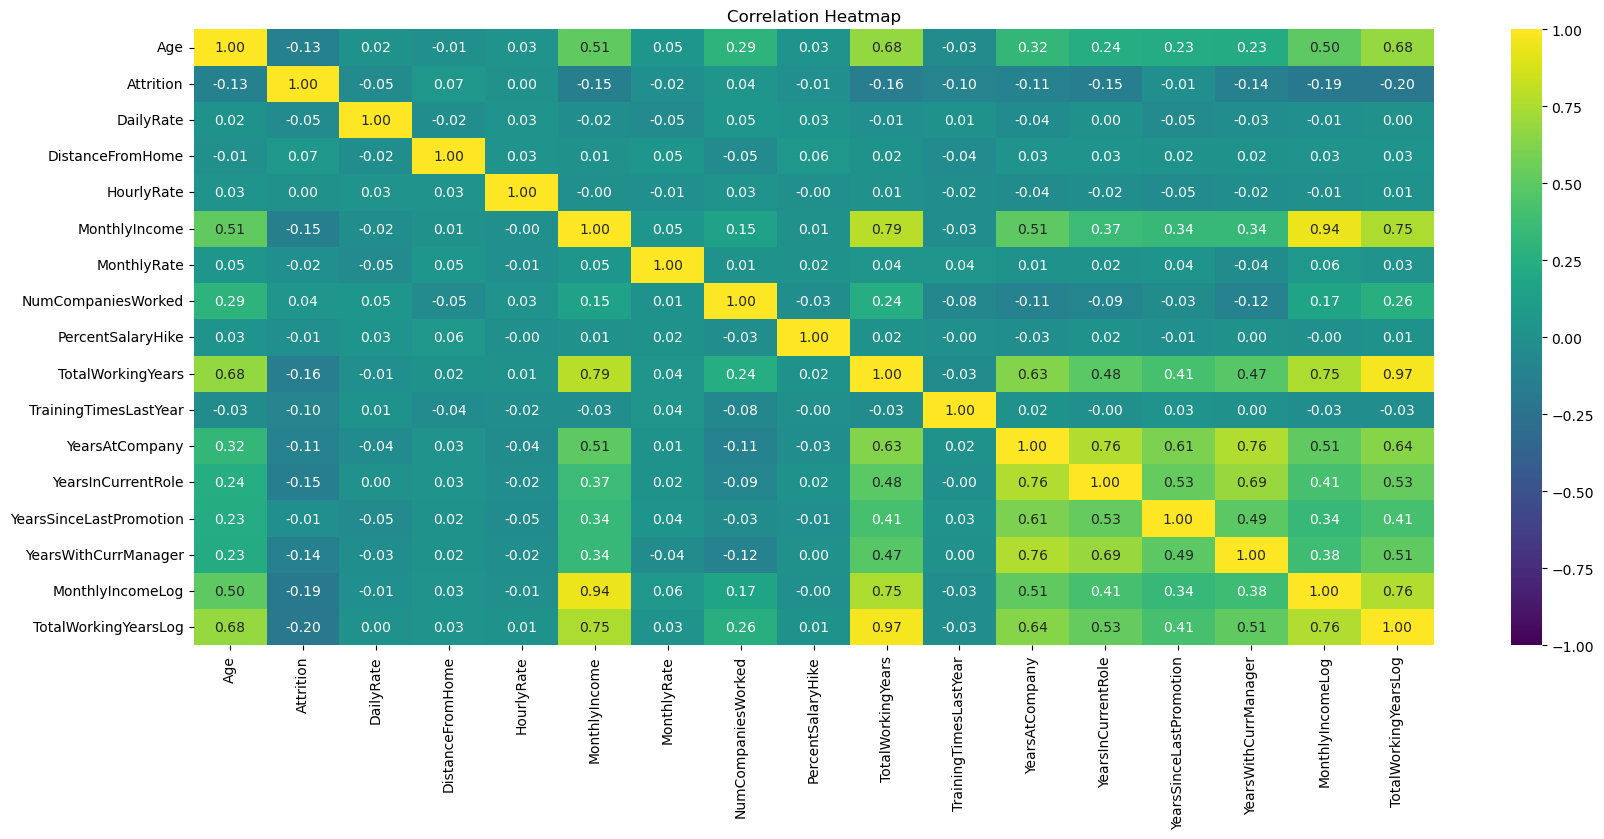

In [9]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
def correlation(df, threshold):
    new_cols = set()
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colsname = correlation_matrix.columns[i]
                new_cols.add(colsname)
    return new_cols

In [11]:
correlation(df, 0.75) #for threshold 0.75

{'MonthlyIncomeLog',
 'TotalWorkingYears',
 'TotalWorkingYearsLog',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [12]:
# for threshold 0.8

correlation(df, 0.8)

{'MonthlyIncomeLog', 'TotalWorkingYearsLog'}

In [13]:
# for threshold 0.9

correlation(df, 0.9)

{'MonthlyIncomeLog', 'TotalWorkingYearsLog'}

In [14]:
# Dropping Highly correlated columns keeping threshold as 0.75


df.drop(correlation(df, threshold=0.75), axis=1, inplace=True)


In [15]:
df.shape

(917, 28)

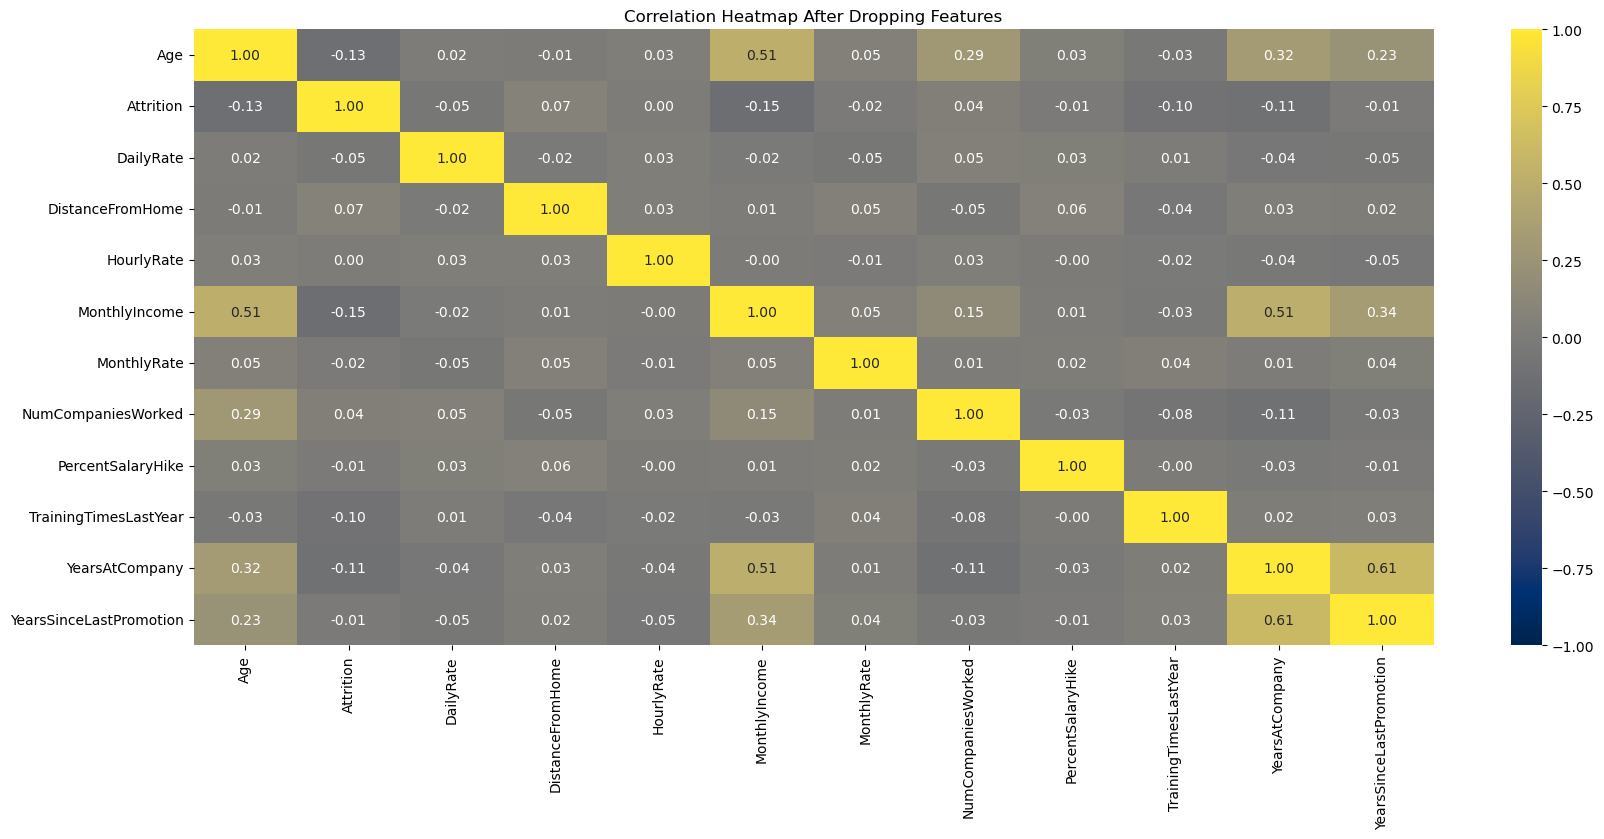

In [16]:
# Visualizing 

plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='cividis', fmt=".2f", vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap After Dropping Features')
plt.show()

In [17]:
df.shape

(917, 28)

### Setting up data preprocessing pipeline

In [18]:
X = df.drop(columns='Attrition')
y = df['Attrition']

In [19]:
# Numerical and categorical columns

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [20]:
categorical_cols

Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance'],
      dtype='object')

In [21]:
numerical_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [22]:
# Numerical Pipeline
numerical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
 
    ]
)

# Categorical Pipeline
categorical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_pipeline', numerical_pipeline, numerical_cols),
        ('categorical_pipeline', categorical_pipeline, categorical_cols)
    ]
)

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [53]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test))

## 1. Decision Tree Classifier - Without hyper parameter tuning

In [54]:
model = DecisionTreeClassifier(random_state=30)

In [55]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [56]:
y_pred = model.predict(X_test)

In [57]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7336956521739131


### Accuracy of the test set is 73.37%

#### Performing additional metrics - Confusion Matrix, classification-report and roc-auc score

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
auc_roc = roc_auc_score(y_test, y_pred)
print(f"\nAUC-ROC Score: {auc_roc}")


Confusion Matrix:
[[120  27]
 [ 22  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       147
           1       0.36      0.41      0.38        37

    accuracy                           0.73       184
   macro avg       0.60      0.61      0.61       184
weighted avg       0.75      0.73      0.74       184


AUC-ROC Score: 0.6108659680088252


### AUC, ROC- Curve

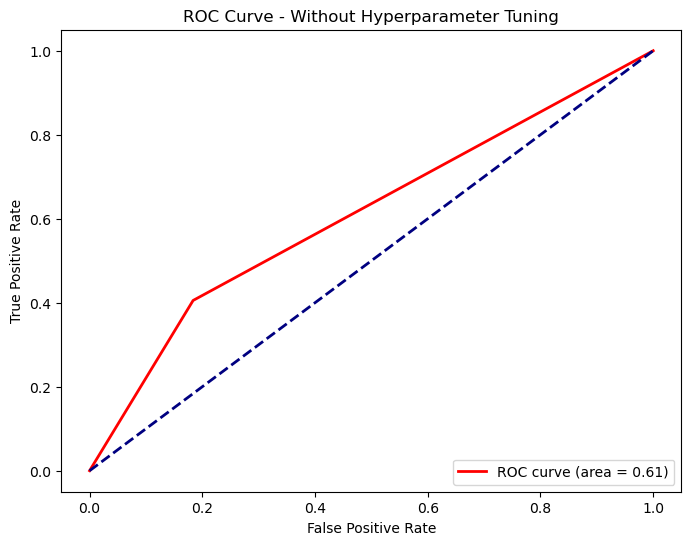

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Without Hyperparameter Tuning')
plt.legend(loc="lower right")
plt.show()


### Inference:

#### Confusion Matrix:
True Positive (TP): 15
True Negative (TN): 120
False Positive (FP): 27
False Negative (FN): 22

#### Classification Report
Precision: The model correctly predicted 15 out of 42 positive instances (37% precision for class 1).
Recall: Out of all actual positive instances, the model correctly identified 15 (41% recall for class 1).
F1-Score: The harmonic mean of precision and recall is 0.38 for class 1.

#### AUC-ROC Score
AUC-ROC is 0.61, which indicates a modest ability of the model to distinguish between the two classes. The score ranges from 0 to 1, with higher values indicating better performance.

-Model has an accuracy of 73%. To handle the imbalances, it is better to fine tune the model and check with different algorithms

## Addressing class imbalance

In [31]:
imbalanced_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=30)),
    ('model', XGBClassifier(random_state=30))
])

imbalanced_pipeline.fit(X_train, y_train)
y_pred_imbalanced = imbalanced_pipeline.predict(X_test)
accuracy_imbalanced = accuracy_score(y_test, y_pred_imbalanced)
print(f"Accuracy with SMOTE: {accuracy_imbalanced}")


Accuracy with SMOTE: 0.8369565217391305


### Decision Tree- with HyperParameter Tuning

In [32]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=30)

grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("Best Parameters:", grid_search_dt.best_params_)


best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Accuracy with Best Parameters: {accuracy_best_dt}")

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy with Best Parameters: 0.8206521739130435


### Evaluating additional metrics with Hyperparameter tuning

In [33]:
# Confusion Matrix
cm_hp = confusion_matrix(y_test, y_pred_best_dt)
print("Confusion Matrix-HP:")
print(cm_hp)

# Classification Report
print("\nClassification Report-HP:")
print(classification_report(y_test, y_pred_best_dt))

# AUC-ROC Score
auc_roc_hp = roc_auc_score(y_test, y_pred_best_dt)
print(f"\nAUC-ROC Score_HP: {auc_roc_hp}")

Confusion Matrix-HP:
[[139   8]
 [ 25  12]]

Classification Report-HP:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       147
           1       0.60      0.32      0.42        37

    accuracy                           0.82       184
   macro avg       0.72      0.63      0.66       184
weighted avg       0.80      0.82      0.80       184


AUC-ROC Score_HP: 0.6349512778084208


### AUC, ROC-Curve


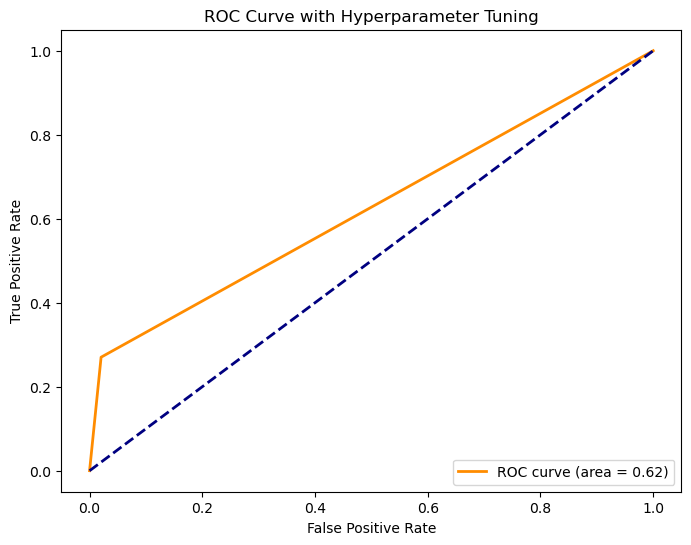

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_imbalanced)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Hyperparameter Tuning')
plt.legend(loc="lower right")
plt.show()


### Feature Importance - Decision Tree 

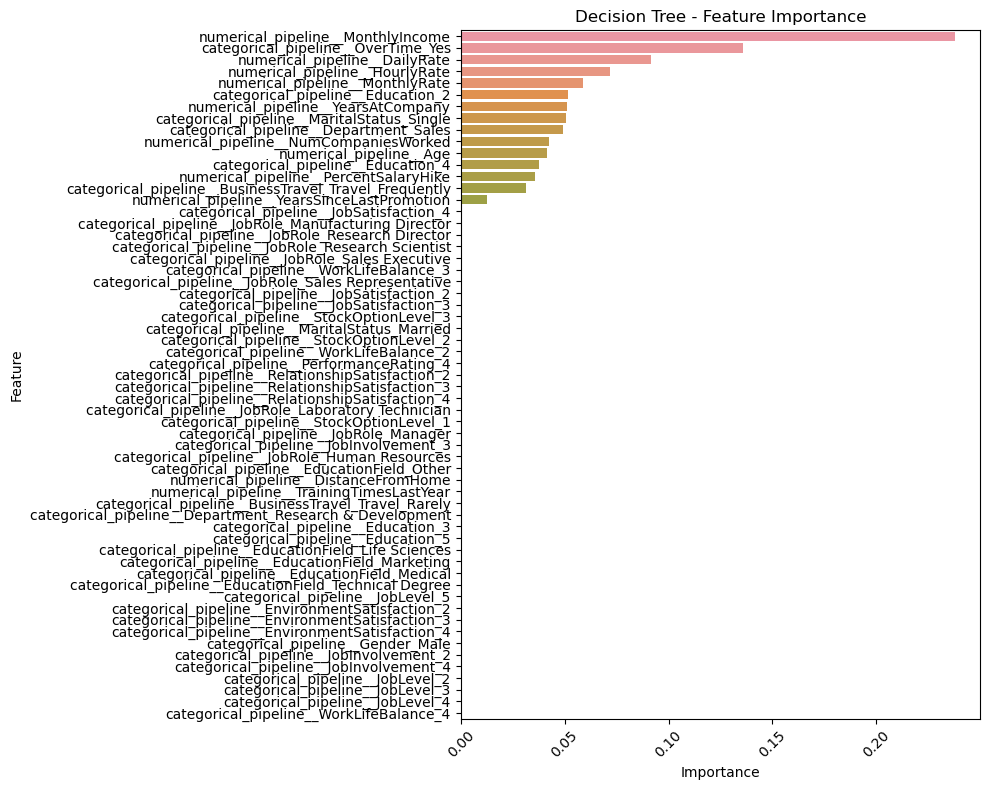

In [58]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Decision Tree - Feature Importance')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()




In [36]:
model_comparison_df = pd.DataFrame({
    'Model': ['Decision Tree - without Hyperparamter Tuning', 'Decision Tree - with Hyperparameter Tuning' ],
    'Accuracy': [accuracy,accuracy_best_dt],
    'AUC-ROC': [auc_roc, auc_roc_hp],
   })


In [37]:
model_comparison_df

,Model,Accuracy,AUC-ROC
0,Decision Tree - without Hyperparamter Tuning,0.733696,0.610866
1,Decision Tree - with Hyperparameter Tuning,0.820652,0.634951


## 2. Random Forest Classifier - Without Hyperparameter Tuning

In [38]:
rf_classifier = RandomForestClassifier(random_state=30)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Random Forest: {accuracy_rf}")


Accuracy with Random Forest: 0.8152173913043478


### Confusion Metrics and Classfication report

In [39]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest:
[[146   1]
 [ 33   4]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       147
           1       0.80      0.11      0.19        37

    accuracy                           0.82       184
   macro avg       0.81      0.55      0.54       184
weighted avg       0.81      0.82      0.75       184



### ROC Curve

In [40]:
auc_roc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
auc_roc_rf

0.7969295826438685

### ROC Curve Visualization

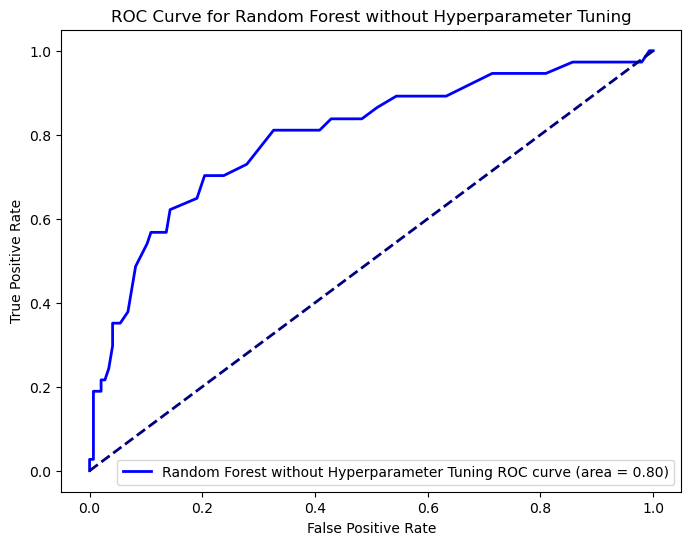

In [41]:
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest without Hyperparameter Tuning ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest without Hyperparameter Tuning')
plt.legend(loc="lower right")
plt.show()

### Random Forest with Hyperparameter tuning and grid search

In [42]:

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=30)

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


print("Best Parameters (Random Forest):", grid_search_rf.best_params_)


best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy with Best Parameters (Random Forest): {accuracy_best_rf}")


Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy with Best Parameters (Random Forest): 0.8043478260869565


### Additional Metrics - Confusion Matrix and classification report

In [43]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_best_rf))

Confusion Matrix for Random Forest:
[[146   1]
 [ 35   2]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       147
           1       0.67      0.05      0.10        37

    accuracy                           0.80       184
   macro avg       0.74      0.52      0.50       184
weighted avg       0.78      0.80      0.73       184



### ROC Curve

In [44]:
auc_roc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
auc_roc_best_rf

0.7839676411104982

### ROC Curve Visualization

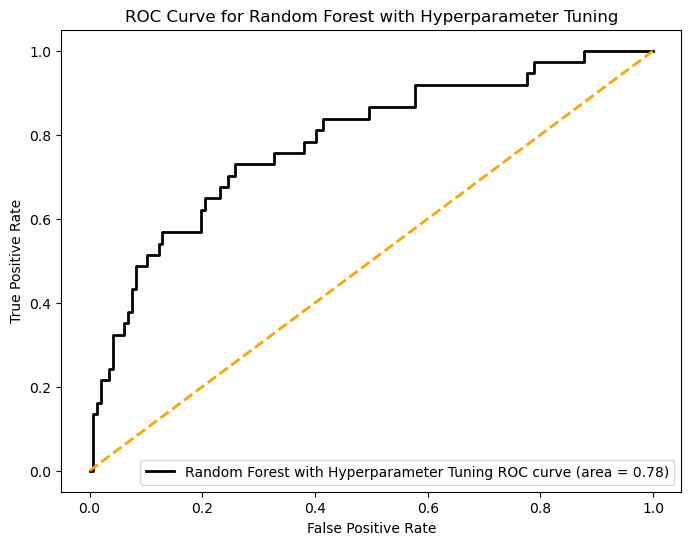

In [45]:
y_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_best_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='black', lw=2, label='Random Forest with Hyperparameter Tuning ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest with Hyperparameter Tuning')
plt.legend(loc="lower right")
plt.show()

### Inference:

#### Confusion Matrix
True Positive (TP): 2
True Negative (TN): 146
False Positive (FP): 1
False Negative (FN): 35

#### Classification Report

Precision (Class 0/1): 81%/67%
Recall (Class 0/1): 99%/5%
F1-Score (Class 0/1): 89%/10%

### Feature Importance

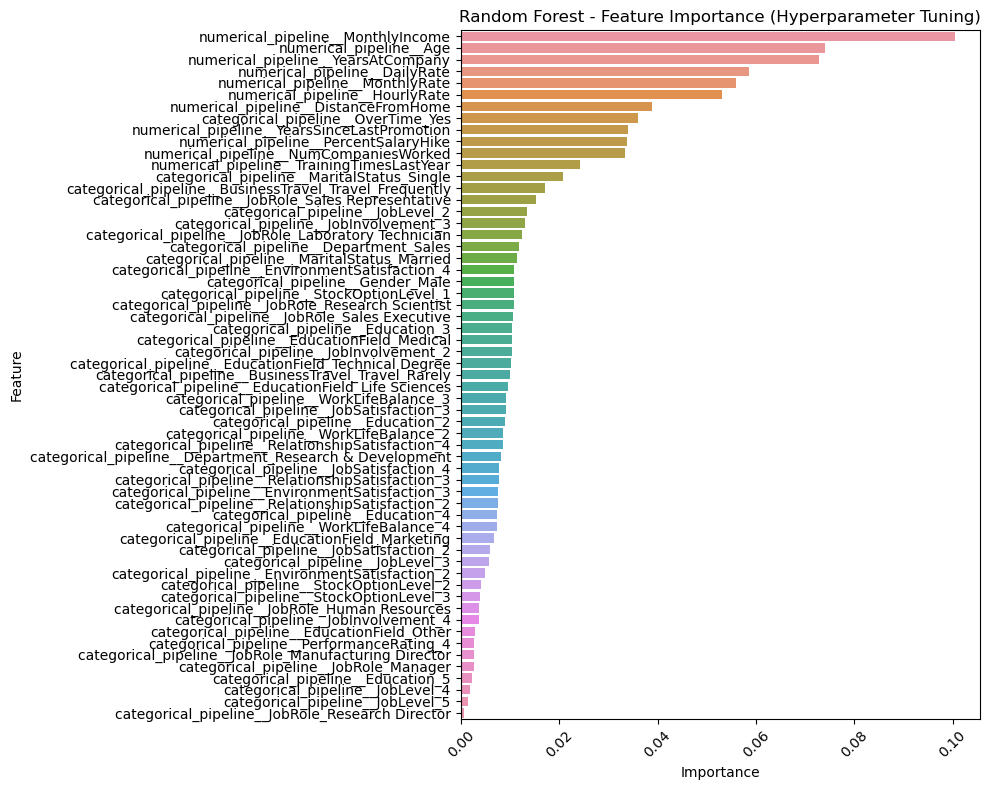

In [59]:
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf_model.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Random Forest - Feature Importance (Hyperparameter Tuning)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

### Model Summary 

In [60]:
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree (No Hyperparameter Tuning)', 'Decision Tree (Hyperparameter Tuning)' ,'Random Forest (No Hyperparameter Tuning)', 'Random Forest (Hyperparameter Tuning)' ],
    'Accuracy': [accuracy,accuracy_best_dt,accuracy_rf,accuracy_best_rf],
    'AUC-ROC': [auc_roc, auc_roc_hp,auc_roc_rf, auc_roc_best_rf],
   })



In [61]:
model_comparison

,Model,Accuracy,AUC-ROC
0,Decision Tree (No Hyperparameter Tuning),0.733696,0.610866
1,Decision Tree (Hyperparameter Tuning),0.820652,0.634951
2,Random Forest (No Hyperparameter Tuning),0.815217,0.796930
3,Random Forest (Hyperparameter Tuning),0.804348,0.783968


## Decision Tree (vs) Random Forest Comparison

#### Decision Tree :

1. The Decision Tree model without hyperparameter tuning achieved an accuracy of 73.37% and an AUC-ROC of 0.61.

2. After hyperparameter tuning, the Decision Tree model showed significant improvement, reaching an accuracy of 82.07% and an AUC-ROC of 0.63.

3. The tuned model demonstrated better precision, recall, and F1-score for both classes compared to the untuned model

#### Random Forest:

1. The Random Forest model without hyperparameter tuning achieved an accuracy of 81.52% and an AUC-ROC of 0.80.

2. Despite hyperparameter tuning, the Random Forest model exhibited a slight decrease in accuracy (80.43%) and AUC-ROC (0.78).

3. The tuned model showed better precision and recall for class 0 but lower recall for class 1, indicating a trade-off

### Conclusion


1. Both Decision Tree and Random Forest models demonstrated improvements with hyperparameter tuning.
2. The Decision Tree model with tuning outperformed the Random Forest model in terms of accuracy (82.07% vs. 80.43%) but had a similar AUC-ROC score.
3. The Decision Tree model, particularly after hyperparameter tuning, seems to strike a balance between interpretability and performance

##### The Decision Tree with Hyperparameter Tuning is a strong model for predicting employee attrition in HR dataset, considering a balance between accuracy, interpretability, and computational efficiency.